In [24]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:

# Importing the dataset
df = pd.read_csv('kr_1.csv', sep=';')
df.head(20)

,HumanFlow,Type,NumberOfReviewInGoogle,NumberOfChecksPerMonth,The_average_number_of_units_in_the_check,AverageIncomeOfThePopulation,The_total_area_is_sq.m.,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread
0,7.793174,0,2.079442,7.906547,0,9.441452,0,1,1,1,0,0
1,7.847763,0,2.197225,8.608495,1,9.418979,1,0,0,0,0,1
2,5.451038,0,2.975973,7.913521,2,9.541800,2,0,0,0,0,0
3,6.885510,0,2.833213,8.751791,3,9.586033,3,0,0,0,1,0
4,6.566672,1,1.609438,9.486608,4,9.323669,4,1,0,0,1,0
5,6.040255,1,2.975973,8.785540,5,9.108308,5,1,0,0,1,0
6,7.586296,2,2.975973,8.753371,6,9.204322,6,0,0,0,1,1
7,7.167038,2,2.975973,8.465900,7,9.317399,7,1,1,0,0,1
8,7.372829,0,2.975973,8.821437,6,9.369427,8,0,0,0,0,0
9,7.013915,0,2.975973,8.110427,8,9.044286,9,1,0,0,1,0


In [26]:
df.shape

(43, 12)

Датасет после подготовки данных содержит в себе 43 наблюдения и 12 переменных.

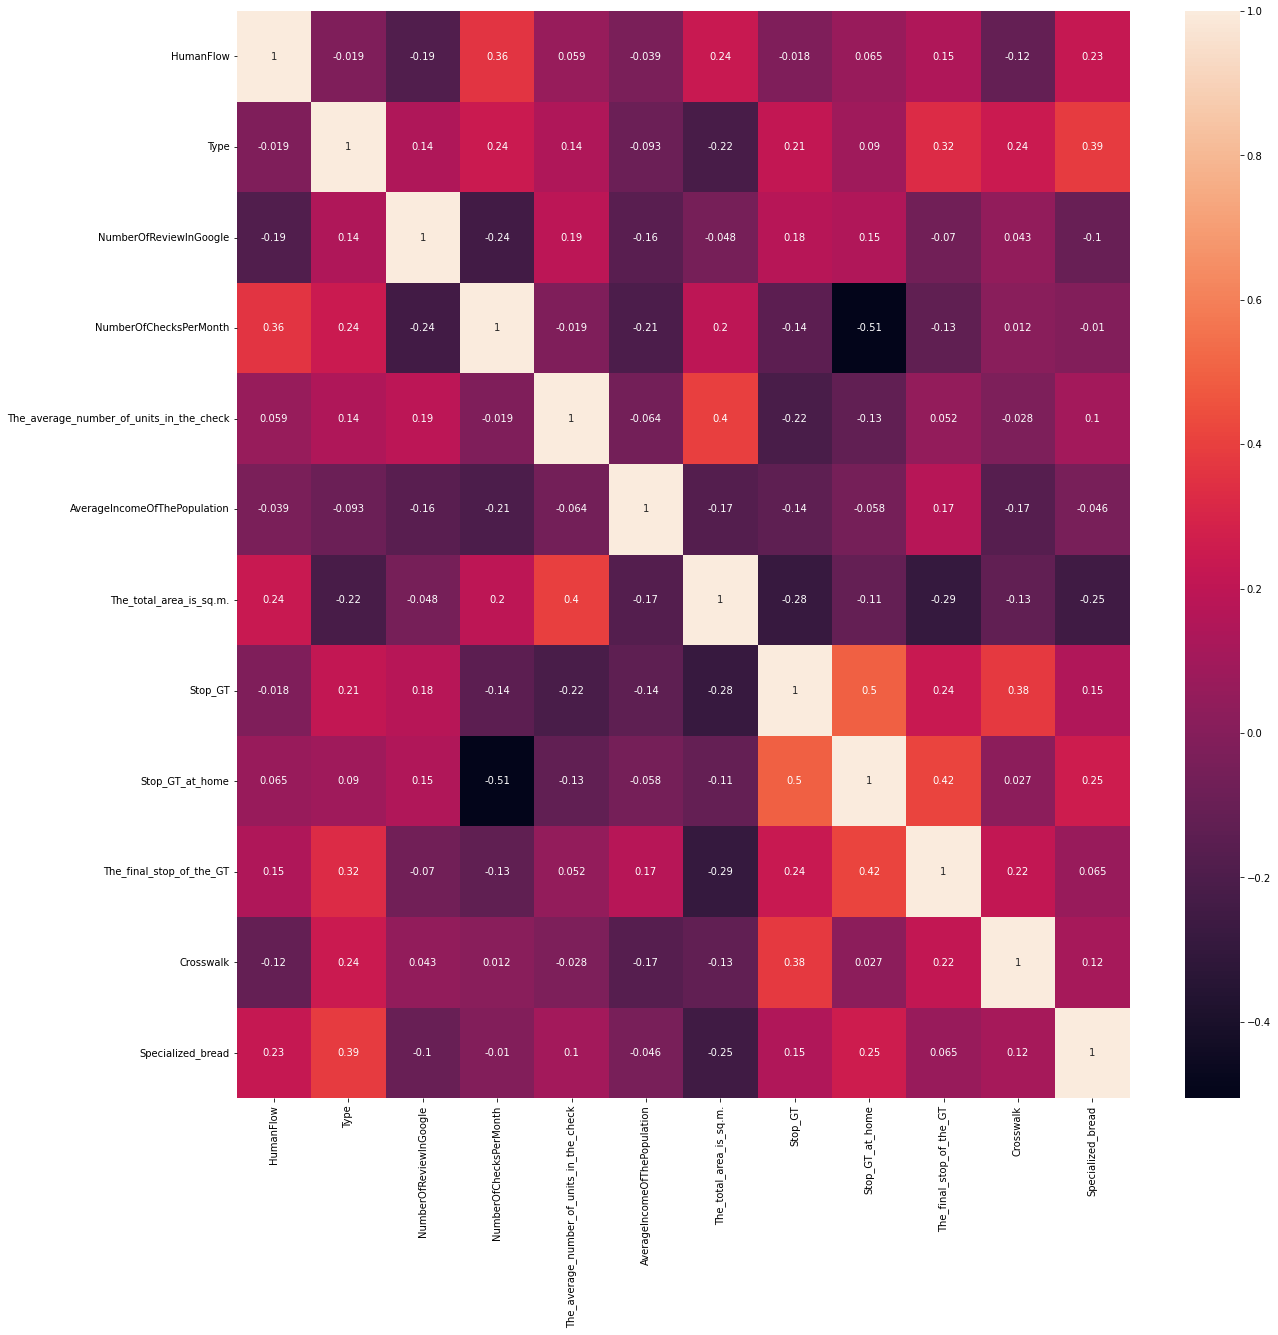

In [27]:

# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

Наиболее влиятельная переменная на зависимую - NumberOfChecksPerMonth. Логично, что количество чеков на прямую зависит от количества людей в магазине.

# Splitting

In [28]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 1:]
y = df['HumanFlow']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Simple Linear Regression

In [29]:

# Fitting Simple Linear Regression to the Training set 
f1 = ['NumberOfChecksPerMonth']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([0.17400073]), 5.803743251291574)

In [30]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3)

0.039

Получено значение R^2 = 0,039. Модель описана на очень низком уровне. Сделаем дальнейшие преобразования и построим множественную регрессию.

In [31]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)
mse1

(0.47, 0.76)

На обучающей выборке значение MSE намного больше. Модель переобучилась.

# Multiple Linear Regression

In [32]:
#!pip install statsmodels

In [33]:

# Fitting Multiple Regression
mr = LinearRegression().fit(X_train, y_train)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3)

0.376

Значение R^2 значительно увеличилось. Однако модель все так же описана не лучшим образом. Продолжим работу с моделью

# Checking p-values

In [34]:

# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train.astype(float), X1.astype(float)).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HumanFlow   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.206
Date:                Thu, 21 Oct 2021   Prob (F-statistic):              0.339
Time:                        14:56:22   Log-Likelihood:                -14.951
No. Observations:                  34   AIC:                             53.90
Df Residuals:                      22   BIC:                             72.22
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        8.5855      8.693      0.988      0.334      -9.442      26.613
Type                                        -0.0521      0.206     -0.253      0.803      -0.479       0.375
NumberOfReviewInGoogle                      -0.0073      0.130     -0.056      0.956      -0.278       0.263
NumberOfChecksPerMonth                       0.2894      0.246      1.179      0.251      -0.220       0.799
The_average_number_of_units_in_the_check    -0.0058      0.015     -0.385      0.704      -0.037       0.025
AverageIncomeOfThePopulation                -0.3894      0.772     -0.504      0.619      -1.990       1.212
The_total_area_is_sq.m.                      0.0002      0.014      0.013      0.990      -0.029       0.029
Stop_GT                                     -0.3817      0.348     -1.097      0.284      -1.103       0.340
Stop_GT_at_home                              0.5141      0.479      1.074      0.294      -0.479       1.507
The_final_stop_of_the_GT                     0.4408      0.476      0.926      0.365      -0.547       1.428
Crosswalk                                   -0.3102      0.214     -1.450      0.161      -0.754       0.133
Specialized_bread                            0.1853      0.301      0.616      0.544      -0.438       0.809
==============================================================================
Omnibus:                        2.571   Durbin-Watson:                   2.671
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.886
Skew:                          -0.399   Prob(JB):                        0.389
Kurtosis:                       2.166   Cond. No.                     2.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Recursive feature elimination

In [35]:
# Feature ranking with recursive feature elimination
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator,  n_features_to_select = 5)
selector = selector.fit(X, y)

# Selected Features
selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

In [36]:
# Fitting Optimized Multiple Regression
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)

# Getting parameters
mr_rfe.coef_, mr_rfe.intercept_

(array([-0.23183258,  0.39287237,  0.36119058,  0.34098977,  0.28001164]),
 3.8970519754197026)

In [37]:
# Predicting the Test set results
y_pred = mr_rfe.predict(X_test[f_lm])

# Coefficient of determination R^2
mr_rfe.score(X_train[f_lm], y_train).round(3)

0.233

In [38]:
# Mean squared error
mse2 = mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)
mse2

(0.42, 0.65)

Итак, смотря на значение p-value мы видим, что каждая из переменных не является значимой. Однако из соответсвующих предикторов были отобраны 5 (значение p-value у которых не преувеличивает 0.45) При данном эксперименте был  получен R^2 = 0,13. Однако, следует заметить, что если увеличить число n_features_to_select  значение MSE значительно увеличивается и ее качество становится хуже. Оптимально n = 5. Но при єтом модель также переобучена

In [39]:
# Backward Elimination with p-values
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y.astype(float), x.astype(float)).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = x.drop(x.columns[j], axis=1)
    regressor_OLS.summary()
    return x

SL = 0.1
X_Modeled = backwardElimination(X_train, y_train, SL)

Отбор соответсвующих значимых переменных по критерию порогового значения (SL). Данный метод удобен для большого числа переменных, когда сложно посчитать сколько именно по критерию p-value значимых предикторов. Таким образом подобрано наиболее оптимальное пороговое значение (0.1).


In [40]:
# Fitting Optimized Multiple Regression
mr_be = LinearRegression().fit(X_Modeled, y_train)

# Coefficient of determination R^2
mr_be.score(X_Modeled, y_train).round(3)

0.274

Улучшено значение R^2 по сравнению с предыдущей моделью

ВЫВОДЫ: модель описана не на высоком уровне и качество желает оставлять лучшего. Поэтому делаем вывод, что тех исходных данных для построения корректной модели недостаточно. Далее следует попробовать построить НС и сделать окончательный вывод. А самой значимой переменной является среднее количество чеков. Логично, что чем больше покупок, тем больший и оборот людей. Но, что было интересно выделить, что так же значимым параметром оказался специализированный хлеб. Данное введение является хорошим маркетинговым ходом и способно привлекать клиента (как был описан пример Класса и их выпечки). Так же значима площадь магазина. Логично, что чем больше площадь, тем больший поток людей.

# Pickle

In [41]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()